# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

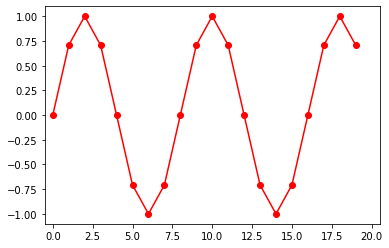

In [2]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
#### (대각선 위의 성분들이 같은 정사각 행렬)

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [4]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [5]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [6]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

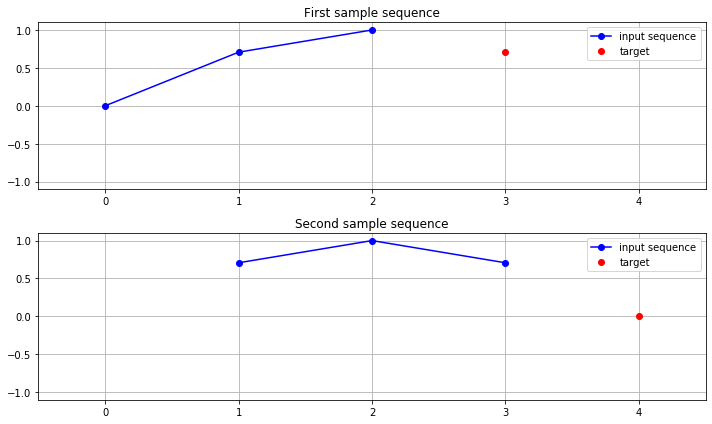

In [7]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

### RNN으로 해결 - SimpleRNN() 사용

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer='sgd')

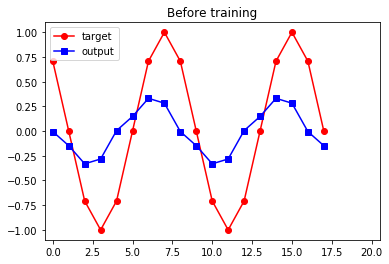

In [11]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [12]:
history = model.fit(X_train, Y_train, epochs=100) 

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2927
Epoch 2/100
18/18 [==============================] - 0s 220us/step - loss: 0.2748
Epoch 3/100
18/18 [==============================] - 0s 220us/step - loss: 0.2582
Epoch 4/100
18/18 [==============================] - 0s 222us/step - loss: 0.2427
Epoch 5/100
18/18 [==============================] - 0s 222us/step - loss: 0.2282
Epoch 6/100
18/18 [==============================] - 0s 222us/step - loss: 0.2147
Epoch 7/100
18/18 [==============================] - 0s 222us/step - loss: 0.2020
Epoch 8/100
18/18 [==============================] - 0s 222us/step - loss: 0.1902
Epoch 9/100
18/18 [==============================] - 0s 166us/step - loss: 0.1791
Epoch 10/100
18/18 [==============================] - 0s 222us/step - loss: 0.1686
Epoch 11/100
18/18 [==============================] - 0s 219us/step - loss: 0.1588
Epoch 12/100
18/18 [==============================] - 0s 277us/step - loss: 0.1496
Epoch 13/100
18

Epoch 100/100
18/18 [==============================] - 0s 222us/step - loss: 0.0026


### 결과 확인

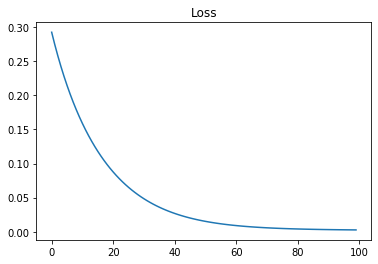

In [13]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show() 

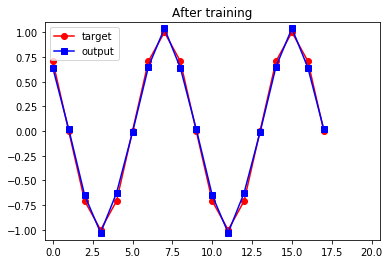

In [14]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show() 

In [15]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_1/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.26183817, -0.4158699 , -0.04839181, -0.03293971, -0.45274195,
        -0.6426876 , -0.55847985, -0.5010671 , -0.3727306 ,  0.5924795 ]],
      dtype=float32)>

In [16]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_1/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.2799106 , -0.01769305, -0.475199  , -0.07075685,  0.35163015,
        -0.5178326 , -0.3002756 , -0.02741877,  0.22698455, -0.411464  ],
       [ 0.3723268 , -0.16682407, -0.5125553 ,  0.11159734,  0.20013519,
         0.6286368 , -0.13951279, -0.16302577, -0.19805345, -0.28709787],
       [-0.18544531, -0.15422042,  0.39557302,  0.25553063, -0.10003302,
         0.26476818,  0.11943281,  0.08422434,  0.4114431 , -0.64310473],
       [-0.08743107,  0.47623122, -0.05263866, -0.15037817, -0.27609578,
         0.31401503, -0.614862  ,  0.30245158,  0.30736613,  0.11142699],
       [-0.18576294, -0.26794916, -0.16976508,  0.62253845,  0.01931249,
         0.10266052, -0.12760235, -0.25325662,  0.3923128 ,  0.5325745 ],
       [ 0.07892572,  0.00944248,  0.41272554,  0.38460454,  0.63781524,
         0.0057697 , -0.34338132,  0.40242615, -0.21037014,  0.12263632],
       [ 0.34621525,  0.32240272, 

In [17]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn_1/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.0033265 ,  0.00185159,  0.00344246,  0.0006037 , -0.00228209,
        0.00374878, -0.00439652,  0.0020116 ,  0.00049625, -0.00286353],
      dtype=float32)>